<a href="https://colab.research.google.com/github/VISHALGAURAV95/admission_prediction/blob/main/predict_admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data=pd.read_csv("Admission_Predict.csv")

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.tail()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [ ]:
data.shape


(400, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
data.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
data.columns


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
data=data.drop("Serial No.",axis=1)

In [ ]:
data.columns


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

Store feature in X and target variable (Response ) in y

In [ ]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
X=data.drop('Chance of Admit ',axis=1)

In [ ]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [ ]:
Y=data['Chance of Admit ']

In [ ]:
Y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
5,0.90
6,0.75
7,0.68
8,0.50
9,0.45


Splitting the dataset into the training and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [ ]:
Y_train


,Chance of Admit
3,0.80
18,0.63
202,0.97
250,0.74
274,0.58
63,0.56
248,0.80
301,0.66
108,0.93
90,0.64


Feature Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.45711129,  0.42466178, -0.057308  , ..., -1.05965163,
         0.13986648,  0.92761259],
       [ 0.1022887 ,  0.42466178, -0.057308  , ..., -0.50194025,
         0.36110014, -1.07803625],
       [ 2.05381293,  2.08593034,  1.6892215 , ...,  1.17119391,
         2.25009529,  0.92761259],
       ...,
       [-0.96217907, -0.40597251, -0.93057275, ..., -0.50194025,
        -0.62594237,  0.92761259],
       [-1.31700165, -1.40273364, -1.8038375 , ..., -1.61736302,
        -2.27668588, -1.07803625],
       [-0.25253389, -0.23984565, -0.93057275, ...,  0.05577114,
        -0.57488845, -1.07803625]])

import the models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

Model training

In [ ]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

svm=SVR()
svm.fit(X_train,Y_train)

rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

gr=GradientBoostingRegressor()
gr.fit(X_train,Y_train)

GradientBoostingRegressor()

Prediction on Test data

In [ ]:
Y_pred1=lr.predict(X_test)
Y_pred2=svm.predict(X_test)
Y_pred3=rf.predict(X_test)
Y_pred4=gr.predict(X_test)


Evaluating the Algorithm

In [ ]:
from sklearn import metrics

In [ ]:
score1=metrics.r2_score(Y_test,Y_pred1)
score2=metrics.r2_score(Y_test,Y_pred2)
score3=metrics.r2_score(Y_test,Y_pred3)
score4=metrics.r2_score(Y_test,Y_pred4)

In [ ]:
print(score1,score2,score3,score4)

0.8212082591486991 0.7597814848647667 0.8087936273783121 0.796137401241082


we get linear regression as the most accurate model

In [ ]:
final_data=pd.DataFrame({ 'Models':['LR','SVR','RF','GR'],'R2_SCORE':[score1,score2,score3,score4]})

In [ ]:
final_data

,Models,R2_SCORE
0,LR,0.821208
1,SVR,0.759781
2,RF,0.808794
3,GR,0.796137


In [ ]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='R2_SCORE'>

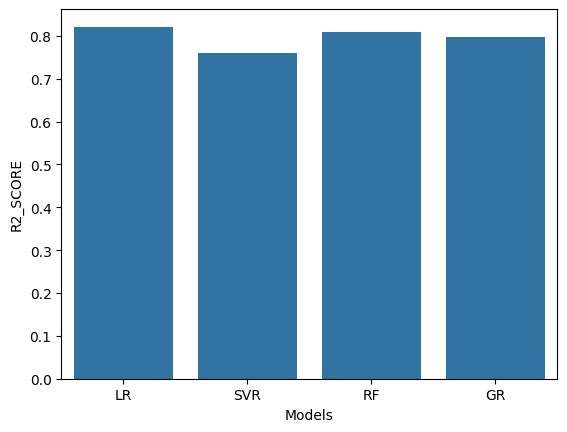

In [ ]:
sns.barplot(x='Models', y='R2_SCORE', data=final_data)

In [ ]:
import joblib


In [ ]:
joblib.dump(lr,'admission_model')

['admission_model']

In [ ]:
model=joblib.load('admission_model')

In [ ]:
model.predict(sc.transform([[337,118,4,4.5,5.5,9.65,1]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.96254032])

In [ ]:
from tkinter import *
import joblib
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create input widgets
gre_score = widgets.IntText(description='GRE Score:', min=200, max=340, step=1)
toefl_score = widgets.IntText(description='TOEFL Score:', min=0, max=120, step=1)
university_rating = widgets.FloatText(description='University Rating:', min=1, max=5, step=0.1)
sop = widgets.FloatText(description='SOP:', min=0, max=5, step=0.1)
lor = widgets.FloatText(description='LOR:', min=0, max=5, step=0.1)
cgpa = widgets.FloatText(description='CGPA:', min=0, max=10, step=0.01)
research = widgets.Dropdown(description='Research:', options=[('No', 0), ('Yes', 1)])

# Create output widget for displaying the result
output = widgets.Output()

# Create a button widget
button = widgets.Button(description='Predict')

# Define the prediction function
def predict_admit(b):
    with output:
        output.clear_output()

        # Collect all input values
        gre = gre_score.value
        toefl = toefl_score.value
        rating = university_rating.value
        sop_value = sop.value
        lor_value = lor.value
        cgpa_value = cgpa.value
        research_value = research.value

        # Print input values
        print(f"GRE Score: {gre}")
        print(f"TOEFL Score: {toefl}")
        print(f"University Rating: {rating}")
        print(f"SOP: {sop_value}")
        print(f"LOR: {lor_value}")
        print(f"CGPA: {cgpa_value}")
        print(f"Research: {'Yes' if research_value else 'No'}")

        # Placeholder for actual prediction model
        # Here we're just taking an average of normalized values as an example
        prediction = (
            (gre / 340) * 10 +  # Normalize GRE to 0-10 scale
            (toefl / 120) * 10 +  # Normalize TOEFL to 0-10 scale
            rating * 2 +  # University rating is already on 1-5 scale, multiply by 2
            sop_value * 2 +  # SOP is on 0-5 scale, multiply by 2
            lor_value * 2 +  # LOR is on 0-5 scale, multiply by 2
            cgpa_value +  # CGPA is already on 0-10 scale
            research_value * 10  # Research is 0 or 1, multiply by 10
        ) / 7  # Divide by number of factors to get average

        print(f"\nPrediction score: {prediction:.2f}")

        # Determine admission chances
        if prediction > 8.5:
            print("High chances of admission")
        else:
            print("Low chances of admission")

# Attach the function to the button
button.on_click(predict_admit)

# Display all widgets
display(gre_score, toefl_score, university_rating, sop, lor, cgpa, research, button, output)

IntText(value=0, description='GRE Score:')

IntText(value=0, description='TOEFL Score:')

FloatText(value=0.0, description='University Rating:', step=0.1)

FloatText(value=0.0, description='SOP:', step=0.1)

FloatText(value=0.0, description='LOR:', step=0.1)

FloatText(value=0.0, description='CGPA:', step=0.01)

Dropdown(description='Research:', options=(('No', 0), ('Yes', 1)), value=0)

Button(description='Predict', style=ButtonStyle())

Output()